In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import re

In [67]:
# generate all CSV files by running the zsh script
def dateparse (time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))
reg = re.compile(r'^coap://\[[0-9a-f:]+::([0-9a-f]+)\]\/.*')
df = pd.read_csv("coap_stats.csv", index_col="timestamp",date_parser=dateparse, parse_dates=True)
df["uid"] = df.request_url.replace(reg, r'\1')
df.head(10)

,request_url,request_time,response_code,status_code,uid
timestamp,,,,,
2020-01-02 15:51:29,coap://[2001:660:4701:f0b1::a386]/sensors/light,90,2.05,0,a386
2020-01-02 15:51:29,coap://[2001:660:4701:f0b1::b585]/sensors/light,2938,2.05,0,b585
2020-01-02 15:51:24,coap://[2001:660:4701:f0b1::b585]/sensors/light,8726,2.05,0,b585
2020-01-02 15:51:24,coap://[2001:660:4701:f0b1::9687]/sensors/light,8760,2.05,0,9687
2020-01-02 15:51:34,coap://[2001:660:4701:f0b1::a386]/sensors/light,55,2.05,0,a386
2020-01-02 15:51:34,coap://[2001:660:4701:f0b1::9687]/sensors/light,88,2.05,0,9687
2020-01-02 15:51:19,coap://[2001:660:4701:f0b1::a386]/sensors/light,16428,2.05,0,a386
2020-01-02 15:51:19,coap://[2001:660:4701:f0b1::9789]/sensors/light,16571,2.05,0,9789
2020-01-02 15:51:29,coap://[2001:660:4701:f0b1::9687]/sensors/light,7273,2.05,0,9687


In [69]:
one = df[(df["status_code"] == 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fa29f60>,
      dtype=object)

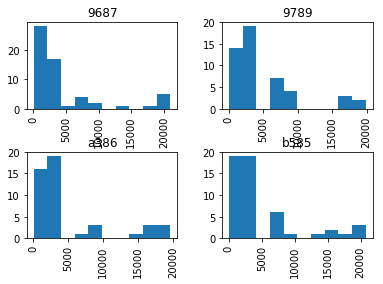

In [70]:
one.request_time.hist(by=one.uid, bins=10)